In [307]:
# imports
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib widget
import numpy as np

## Importing the Data


In [308]:
# import the data
data = pd.read_csv('Dataset-Mental-Disorders.csv')
df = data.copy()

print('shape:', df.shape)

# print a random 5 rows
df.sample(5)

shape: (120, 19)


,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
48,Patiant-49,Seldom,Usually,Usually,Usually,YES,YES,NO,NO,NO,NO,NO,YES,NO,NO,5 From 10,4 From 10,6 From 10,Bipolar Type-1
11,Patiant-12,Seldom,Sometimes,Sometimes,Usually,YES,YES,YES,NO,YES,YES,NO,YES,NO,YES,8 From 10,4 From 10,9 From 10,Bipolar Type-1
22,Patiant-23,Sometimes,Sometimes,Sometimes,Usually,NO,NO,YES,YES,YES,NO,NO,NO,NO,YES,3 From 10,7 From 10,6 From 10,Normal
110,Patiant-111,Sometimes,Most-Often,Usually,Usually,NO,NO,NO,YES,NO,NO,NO,NO,YES,NO,4 From 10,7 From 10,5 From 10,Normal
118,Patiant-119,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES,7 From 10,7 From 10,7 From 10,Depression


# Cleaning the Data


In [309]:
# remove the patient numbers
df = df.drop('Patient Number', axis=1)

# fix spelling errors in columns
df = df.rename(columns={
    'Optimisim': 'Optimism',
    'Anorxia': 'Anorexia',
    'Suicidal thoughts': 'Suicidal Thoughts',
    'Sleep dissorder': 'Sleep Disorder'
    })

df.sample(5)

,Sadness,Euphoric,Exhausted,Sleep Disorder,Mood Swing,Suicidal Thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
112,Seldom,Usually,Usually,Sometimes,YES,NO,YES,YES,YES,YES,YES,YES,NO,YES,8 From 10,8 From 10,5 From 10,Bipolar Type-1
94,Most-Often,Seldom,Most-Often,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,YES,2 From 10,8 From 10,4 From 10,Depression
68,Usually,Seldom,Most-Often,Usually,YES,YES,NO,NO,YES,NO,NO,YES,YES,NO,7 From 10,5 From 10,4 From 10,Bipolar Type-2
32,Sometimes,Seldom,Most-Often,Seldom,YES,YES,NO,YES,NO,NO,YES,YES,NO,YES,5 From 10,5 From 10,4 From 10,Bipolar Type-2
74,Usually,Sometimes,Seldom,Seldom,YES,NO,YES,NO,NO,YES,NO,YES,YES,YES,3 From 10,7 From 10,4 From 10,Bipolar Type-2


In [310]:
# see unique values for each column
for col in df.columns:
    print(col, df[col].unique())

Sadness ['Usually' 'Sometimes' 'Seldom' 'Most-Often']
Euphoric ['Seldom' 'Most-Often' 'Usually' 'Sometimes']
Exhausted ['Sometimes' 'Usually' 'Seldom' 'Most-Often']
Sleep Disorder ['Sometimes' 'Most-Often' 'Usually' 'Seldom']
Mood Swing ['YES' 'NO']
Suicidal Thoughts ['YES ' 'YES' 'NO']
Anorexia ['NO' 'YES']
Authority Respect ['NO' 'YES']
Try-Explanation ['YES' 'NO']
Aggressive Response ['NO' 'YES']
Ignore & Move-On ['NO' 'YES']
Nervous Break-down ['YES' 'NO']
Admit Mistakes ['YES' 'NO']
Overthinking ['YES' 'NO']
Sexual Activity ['3 From 10' '4 From 10' '6 From 10' '5 From 10' '7 From 10' '8 From 10'
 '9 From 10' '2 From 10' '1 From 10']
Concentration ['3 From 10' '2 From 10' '5 From 10' '4 From 10' '7 From 10' '6 From 10'
 '1 From 10' '8 From 10']
Optimism ['4 From 10' '5 From 10' '7 From 10' '2 From 10' '6 From 10' '9 From 10'
 '3 From 10' '8 From 10' '1 From 10']
Expert Diagnose ['Bipolar Type-2' 'Depression' 'Bipolar Type-1' 'Normal']


In [311]:
# right now, all the columns are objects (meaning strings)
# ideally, all the columns should be ints or floats
df.dtypes

Sadness                object
Euphoric               object
Exhausted              object
Sleep Disorder         object
Mood Swing             object
Suicidal Thoughts      object
Anorexia               object
Authority Respect      object
Try-Explanation        object
Aggressive Response    object
Ignore & Move-On       object
Nervous Break-down     object
Admit Mistakes         object
Overthinking           object
Sexual Activity        object
Concentration          object
Optimism               object
Expert Diagnose        object
dtype: object

In [312]:
# convert the numerical columns into numbers
df[['Sexual Activity', 'Concentration', 'Optimism']] = df[['Sexual Activity', 'Concentration', 'Optimism']].map(lambda x: int(x.replace(" From 10", '')))

In [313]:
df.dtypes

Sadness                object
Euphoric               object
Exhausted              object
Sleep Disorder         object
Mood Swing             object
Suicidal Thoughts      object
Anorexia               object
Authority Respect      object
Try-Explanation        object
Aggressive Response    object
Ignore & Move-On       object
Nervous Break-down     object
Admit Mistakes         object
Overthinking           object
Sexual Activity         int64
Concentration           int64
Optimism                int64
Expert Diagnose        object
dtype: object

In [314]:
# Suicidal Thoughts has a mistype of 'YES ' instead of 'YES', lets fix that
df['Suicidal Thoughts'] = df['Suicidal Thoughts'].apply(lambda x: x.strip())

## Converting the categorical data into numerical data (through either one-hot encoding or label encoding)


In [315]:
# see unique values for each column
for col in df.columns[1:]:
    print(col, df[col].unique())

Euphoric ['Seldom' 'Most-Often' 'Usually' 'Sometimes']
Exhausted ['Sometimes' 'Usually' 'Seldom' 'Most-Often']
Sleep Disorder ['Sometimes' 'Most-Often' 'Usually' 'Seldom']
Mood Swing ['YES' 'NO']
Suicidal Thoughts ['YES' 'NO']
Anorexia ['NO' 'YES']
Authority Respect ['NO' 'YES']
Try-Explanation ['YES' 'NO']
Aggressive Response ['NO' 'YES']
Ignore & Move-On ['NO' 'YES']
Nervous Break-down ['YES' 'NO']
Admit Mistakes ['YES' 'NO']
Overthinking ['YES' 'NO']
Sexual Activity [3 4 6 5 7 8 9 2 1]
Concentration [3 2 5 4 7 6 1 8]
Optimism [4 5 7 2 6 9 3 8 1]
Expert Diagnose ['Bipolar Type-2' 'Depression' 'Bipolar Type-1' 'Normal']


In [316]:
df_clean = df.copy()

In [317]:
# convert the binary columns (YES and NO) into 1s and 0s

for col in df.columns:
    if df[col].nunique() == 2:
        df[col] = df[col].apply(lambda x: 1 if x == 'YES' else 0)

print('dtypes after converstion:\n', df.dtypes)

dtypes after converstion:
 Sadness                object
Euphoric               object
Exhausted              object
Sleep Disorder         object
Mood Swing              int64
Suicidal Thoughts       int64
Anorexia                int64
Authority Respect       int64
Try-Explanation         int64
Aggressive Response     int64
Ignore & Move-On        int64
Nervous Break-down      int64
Admit Mistakes          int64
Overthinking            int64
Sexual Activity         int64
Concentration           int64
Optimism                int64
Expert Diagnose        object
dtype: object


In [318]:
# see unique values for each column
for col in df.columns[1:]:
    print(col, df[col].unique())

Euphoric ['Seldom' 'Most-Often' 'Usually' 'Sometimes']
Exhausted ['Sometimes' 'Usually' 'Seldom' 'Most-Often']
Sleep Disorder ['Sometimes' 'Most-Often' 'Usually' 'Seldom']
Mood Swing [1 0]
Suicidal Thoughts [1 0]
Anorexia [0 1]
Authority Respect [0 1]
Try-Explanation [1 0]
Aggressive Response [0 1]
Ignore & Move-On [0 1]
Nervous Break-down [1 0]
Admit Mistakes [1 0]
Overthinking [1 0]
Sexual Activity [3 4 6 5 7 8 9 2 1]
Concentration [3 2 5 4 7 6 1 8]
Optimism [4 5 7 2 6 9 3 8 1]
Expert Diagnose ['Bipolar Type-2' 'Depression' 'Bipolar Type-1' 'Normal']


### We only have five non-integer columns left, which can be converted into label-encoded columns.


In [319]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df_categorical = df.select_dtypes(include='object')
df_categorical = df_categorical.apply(encoder.fit_transform)
df_categorical

# now we need to join the numerical columns with the categorical columns
df = df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df

,Mood Swing,Suicidal Thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Sadness,Euphoric,Exhausted,Sleep Disorder,Expert Diagnose
0,1,1,0,0,1,0,0,1,1,1,3,3,4,3,1,2,2,1
1,0,1,0,0,0,0,0,0,0,0,4,2,5,3,1,3,2,2
2,1,0,0,0,1,1,0,1,1,0,6,5,7,2,0,2,2,0
3,1,1,1,0,1,0,0,0,0,0,3,2,2,3,1,3,0,1
4,0,0,0,0,0,0,0,1,1,1,5,5,6,3,3,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,1,0,0,1,0,1,0,0,1,2,5,3,0,1,3,2,2
116,1,0,0,0,0,1,0,0,0,1,6,7,8,2,2,2,1,0
117,1,0,1,1,0,0,0,1,0,1,1,5,3,3,2,3,2,1
118,0,1,1,0,1,1,1,0,1,1,7,7,7,3,2,1,1,2


In [320]:
# see unique values for each column
for col in df.columns[1:]:
    print(col, df[col].unique())

Suicidal Thoughts [1 0]
Anorexia [0 1]
Authority Respect [0 1]
Try-Explanation [1 0]
Aggressive Response [0 1]
Ignore & Move-On [0 1]
Nervous Break-down [1 0]
Admit Mistakes [1 0]
Overthinking [1 0]
Sexual Activity [3 4 6 5 7 8 9 2 1]
Concentration [3 2 5 4 7 6 1 8]
Optimism [4 5 7 2 6 9 3 8 1]
Sadness [3 2 1 0]
Euphoric [1 0 3 2]
Exhausted [2 3 1 0]
Sleep Disorder [2 0 3 1]
Expert Diagnose [1 2 0 3]


### Now resolve any issues with missing or null values


In [321]:
# check for missing and null values
print('null values:\n', df.isnull().sum())

#check for nan values
print('\nNaN values:\n', df.isna().sum())

null values:
 Mood Swing             0
Suicidal Thoughts      0
Anorexia               0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimism               0
Sadness                0
Euphoric               0
Exhausted              0
Sleep Disorder         0
Expert Diagnose        0
dtype: int64

NaN values:
 Mood Swing             0
Suicidal Thoughts      0
Anorexia               0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimism               0
Sadness                0
Euphoric               0
Exhausted              0
Sleep Disorder         0
Expert Diagnose        0
dtype: int64


Turns out we don't need to do anything with this. There are no missing values in the dataset.


# Partitioning the data

### We will be partitioning the data into the following sets:

- #### Training set: 80% to train the model
- #### Cross-Validation set: 10% to choose the best model
- #### Test set: 10% to test the model and calculate final analytics


In [322]:
# split into features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# create training partition
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.2, random_state=42)

# create validation and test partitions
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)

# print the shape of each partition
print('X_train:', X_train.shape)
print('X_cv:', X_cv.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_cv:', y_cv.shape)
print('y_test:', y_test.shape)

X_train: (96, 17)
X_cv: (12, 17)
X_test: (12, 17)
y_train: (96,)
y_cv: (12,)
y_test: (12,)


### So we have 17 features.


# Build and train the model

Our network is comprised of 3 hidden layers, with 36, 24, and 12 neurons respectively. The output layer has 4 neurons, one for each class.

We're using ReLU activation functions for the hidden layers and a softmax activation function for the output layer.

_note: softmax calculations are better done with 'linear' activation passed to the output layer and the 'from-logits=True' parameter passed to to the loss function (which will be SparseCategoricalCrossentropy in this case)._


In [323]:
# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer((17,)),
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='linear')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
)

In [324]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 32)                576       
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 4)                 68        
                                                                 
Total params: 1,172
Trainable params: 1,172
Non-trainable params: 0
_________________________________________________________________


In [325]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_cv, y_cv),
    epochs=100,
    batch_size=50
)


Epoch 1/100
2/2 [==============================] - 0s 92ms/step - loss: 2.1451 - val_loss: 1.8409
Epoch 2/100
2/2 [==============================] - 0s 43ms/step - loss: 1.5090 - val_loss: 1.3612
Epoch 3/100
2/2 [==============================] - 0s 29ms/step - loss: 1.3582 - val_loss: 1.1658
Epoch 4/100
2/2 [==============================] - 0s 23ms/step - loss: 1.3170 - val_loss: 1.1028
Epoch 5/100
2/2 [==============================] - 0s 23ms/step - loss: 1.2847 - val_loss: 1.0915
Epoch 6/100
2/2 [==============================] - 0s 24ms/step - loss: 1.2009 - val_loss: 1.0902
Epoch 7/100
2/2 [==============================] - 0s 18ms/step - loss: 1.1502 - val_loss: 1.1022
Epoch 8/100
2/2 [==============================] - 0s 20ms/step - loss: 1.0907 - val_loss: 1.0876
Epoch 9/100
2/2 [==============================] - 0s 28ms/step - loss: 1.0221 - val_loss: 1.0573
Epoch 10/100
2/2 [==============================] - 0s 27ms/step - loss: 0.9469 - val_loss: 1.0344
Epoch 11/100
2/2 [=

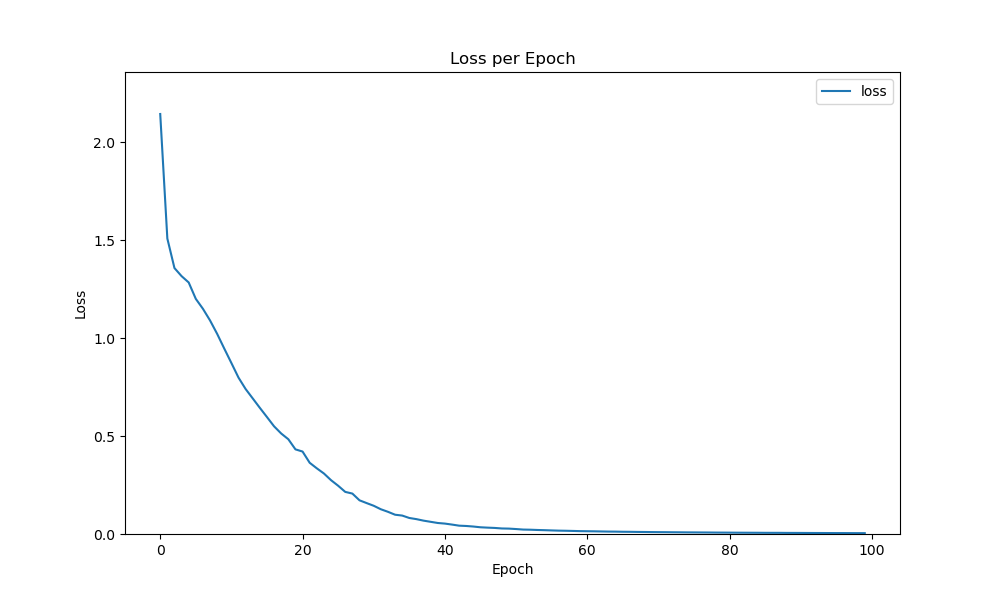

In [326]:
# plot the loss per epoch
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(history.history['loss'], label='loss')
ax.set_ylim([0, np.max(history.history['loss'])*1.1])
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
ax.title.set_text('Loss per Epoch')
plt.show()

# See how our model did


### Prediction for one participant


In [327]:
# see one prediction
# participant 23 has Depression
depressed_participant = X.iloc[23, :]

prediction = tf.nn.softmax(model.predict(depressed_participant.values.reshape(1, -1))).numpy()
print('prediction for participant 23:', prediction)

labels = encoder.inverse_transform([0, 1, 2, 3])
print('labels:', labels)

# create a dictionary with labels as the keys and prediction as the values
predictions = {label: pred for label, pred in zip(labels, prediction[0])}

# prediction for participant 23 is the label with the highest prediction value (a.k.a. highest probability)
PRED_23 = max(predictions, key=predictions.get)
print('\nPrediction for participant 23 (true label is Depression):')
PRED_23

1/1 [==============================] - 0s 36ms/step
prediction for participant 23: [[1.3996901e-04 4.4838141e-04 9.9157155e-01 7.8401212e-03]]
labels: ['Bipolar Type-1' 'Bipolar Type-2' 'Depression' 'Normal']

Prediction for participant 23 (true label is Depression):


'Depression'

### See how the model does on our test set


In [328]:
# evaluate model on our test set
pred_test = model.predict(X_test)
pred_test = tf.nn.softmax(pred_test)
pred_test = np.argmax(pred_test, axis=1)

print('predicted labels:', encoder.inverse_transform(pred_test))
print('true labels:', encoder.inverse_transform(y_test))

error_count = (pred_test != y_test).sum()
print('got {} wrong out of {} ({}%)'.format(error_count, len(y_test), error_count/len(y_test)*100))

1/1 [==============================] - 0s 20ms/step
predicted labels: ['Depression' 'Depression' 'Depression' 'Normal' 'Bipolar Type-1'
 'Depression' 'Bipolar Type-1' 'Bipolar Type-1' 'Bipolar Type-2'
 'Bipolar Type-1' 'Normal' 'Bipolar Type-1']
true labels: ['Depression' 'Depression' 'Depression' 'Bipolar Type-1' 'Bipolar Type-1'
 'Depression' 'Bipolar Type-1' 'Bipolar Type-2' 'Bipolar Type-2' 'Normal'
 'Normal' 'Bipolar Type-1']
got 3 wrong out of 12 (25.0%)


In [329]:
# test accuracy on the train vs cross-validation vs test set
train_acc = np.sum([1 for pred, true in zip(model.predict(X_train), y_train) if np.argmax(pred) == true]) / len(y_train)
print('train accuracy:', train_acc)
cv_acc = np.sum([1 for pred, true in zip(model.predict(X_cv), y_cv) if np.argmax(pred) == true]) / len(y_cv)
print('cross-validation accuracy:', cv_acc)
test_acc = np.sum([1 for pred, true in zip(model.predict(X_test), y_test) if np.argmax(pred) == true]) / len(y_test)
print('test accuracy:', test_acc)


3/3 [==============================] - 0s 2ms/step
train accuracy: 1.0
1/1 [==============================] - 0s 14ms/step


cross-validation accuracy: 0.8333333333333334
1/1 [==============================] - 0s 16ms/step
test accuracy: 0.75


In [330]:
survey = [
    'Seldom',
    'Most-Often',
    'Sometimes',
    'Seldom',
    'NO',
    'NO',
    'NO',
    'NO',
    'YES',
    'YES',
    'YES',
    'NO',
    'NO',
    'NO',
    '9',
    '1',
    '6'
]

# convert the survey into a dataframe
# Convert the survey into numerical values using encoder.transform
# survey_numeric = encoder.transform(survey)

# Convert the survey into a dataframe
# survey_df = pd.DataFrame(np.reshape(survey, (1, -1)), columns=X.columns)

survey_ = survey

for i in range(len(survey)):
    encoder.fit(df_clean.iloc[:, i])
    survey_[i] = encoder.transform([survey[i]])

krrish = pd.DataFrame(survey_).T
krrish_diagnosis = model.predict(krrish)
krrish_diagnosis = tf.nn.softmax(krrish_diagnosis)

1/1 [==============================] - 0s 17ms/step


In [331]:
# get the diagnosis using the encoder
encoder.fit(data['Expert Diagnose'])
# get the index of the highest value in the diagnosis
krrish_diagnosis = np.argmax(krrish_diagnosis)
# get the label using the index
krrish_diagnosis = encoder.inverse_transform([krrish_diagnosis])
krrish_diagnosis = krrish_diagnosis[0]

In [332]:
krrish_diagnosis

'Bipolar Type-2'